In [5]:
#gpaw conda
from jarvis.db.figshare import data
import pandas as pd

d=data('dft_3d')
df = pd.DataFrame(d)
prop='formation_energy_peratom'
df_kv = df[df[prop]!='na']

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [6]:
df.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality',
       'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys',
       'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv',
       'shear_modulus_gv', 'mbj_bandgap', 'hse_ga

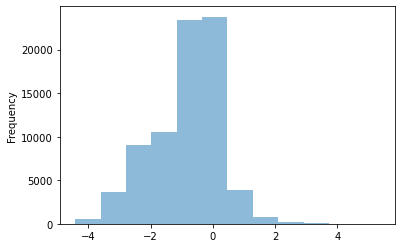

In [7]:
%matplotlib inline
ax = df_kv[prop].plot.hist(bins=12, alpha=0.5)

In [4]:
from jarvis.core.composition import Composition
from jarvis.core.specie import Specie
import numpy as np
from jarvis.ai.descriptors.cfid import get_chem_only_descriptors
from jarvis.ai.descriptors.elemental import get_element_fraction_desc

def mean_absolute_deviation(data, axis=None):
    """Get Mean absolute deviation."""
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

X=[]
Y=[]
IDs=[]
for ii,i in df_kv.iterrows():
    comp=i['formula']
    desc=get_element_fraction_desc(comp)
    val=i[prop]
    X.append(desc)
    Y.append(val)
    IDs.append(ii)
X = np.array(X)
Y = np.array(Y).reshape(-1, 1)
IDs = np.array(IDs)
mad = mean_absolute_deviation(Y)
print('MAD:',mad)  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.1)
rf = RandomForestRegressor(n_estimators=90, max_depth = 4, n_jobs=-1, random_state=0,bootstrap=False)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(list(y_test), pred))
mae = mean_absolute_error(list(y_test), pred)
print('RMSE is %.3f' % rmse)
print('MAE is %.3f' % mae)
print('R2 score is: %.3f' % r2_score(list(y_test), pred))
print('MAD:MAE',mad/mae)

MAD: 0.8611604252986109


/tmp/ipykernel_5662/925101042.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RMSE is 0.691
MAE is 0.488
R2 score is: 0.596
MAD:MAE 1.7641150085640318


In [ ]:
from jarvis.core.composition import Composition
from jarvis.core.specie import Specie
import numpy as np
from jarvis.ai.descriptors.cfid import get_chem_only_descriptors
from jarvis.ai.descriptors.elemental import get_element_fraction_desc

def mean_absolute_deviation(data, axis=None):
    """Get Mean absolute deviation."""
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

X=[]
Y=[]
IDs=[]
for ii,i in df_kv.iterrows():
    comp=i['formula']
    desc=get_chem_only_descriptors(comp)
    val=i[prop]
    X.append(desc)
    Y.append(val)
    IDs.append(ii)
X = np.array(X)
Y = np.array(Y).reshape(-1, 1)
IDs = np.array(IDs)
mad = mean_absolute_deviation(Y)
print('MAD:',mad)  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.1)
rf = RandomForestRegressor()#n_estimators=90, max_depth = 4, n_jobs=-1, random_state=0,bootstrap=False)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(list(y_test), pred))
mae = mean_absolute_error(list(y_test), pred)
print('RMSE is %.3f' % rmse)
print('MAE is %.3f' % mae)
print('R2 score is: %.3f' % r2_score(list(y_test), pred))
print('MAD:MAE',mad/mae)

In [33]:
from jarvis.core.composition import Composition
from jarvis.core.specie import Specie
import numpy as np
from jarvis.ai.descriptors.cfid import get_chem_only_descriptors
from jarvis.ai.descriptors.elemental import get_element_fraction_desc

def mean_absolute_deviation(data, axis=None):
    """Get Mean absolute deviation."""
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

X=[]
Y=[]
IDs=[]
for ii,i in df_kv.iterrows():
    comp=i['formula']
    density=i['density']
    spg=int(i['spg_number'])
    desc=get_element_fraction_desc(comp)
    desc = np.append(np.append(desc,density),spg)
    val=i[prop]
    X.append(desc)
    Y.append(val)
    IDs.append(ii)
X = np.array(X)
Y = np.array(Y).reshape(-1, 1)
IDs = np.array(IDs)
mad = mean_absolute_deviation(Y)
print('MAD:',mad)  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.1)
rf = RandomForestRegressor(n_estimators=90, max_depth = 4, n_jobs=-1, random_state=0,bootstrap=False)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(list(y_test), pred))
mae = mean_absolute_error(list(y_test), pred)
print('RMSE is %.3f' % rmse)
print('MAE is %.3f' % mae)
print('R2 score is: %.3f' % r2_score(list(y_test), pred))
print('MAD:MAE',mad/mae)

MAD: 0.8611604252986109


/tmp/ipykernel_5391/3572972437.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RMSE is 0.691
MAE is 0.489
R2 score is: 0.596
MAD:MAE 1.761283397178194


In [32]:
density

5.145

In [32]:
#https://github.com/mathsphy/paper-ml-robustness-material-property/blob/main/myfunc.py
def StructureFeaturizer(
        df_in,
        col_id='structure',
        ignore_errors=True,
        chunksize=30
        ):
    """
    Featurize a dataframe using Matminter Structure featurizer

    Parameters
    ----------
    df : Pandas.DataFrame 
        DataFrame with a column named "structure"

    Returns
    -------
    A DataFrame containing 273 features (columns)

    """
    # For featurization
    from matminer.featurizers.base import MultipleFeaturizer
    from matminer.featurizers.composition import (ElementProperty, 
                                                  Stoichiometry, 
                                                  ValenceOrbital, 
                                                  IonProperty)
    from matminer.featurizers.structure import (SiteStatsFingerprint, 
                                                StructuralHeterogeneity,
                                                ChemicalOrdering, 
                                                StructureComposition, 
                                                MaximumPackingEfficiency)
    
    
    if isinstance(df_in, pd.Series):
        df = df_in.to_frame()
    else:
        df = df_in
    #df[col_id] = df[col_id].apply(to_unitcell)
    
    # 128 structural feature
    struc_feat = [
        SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"), 
        SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"),
        StructuralHeterogeneity(),
        MaximumPackingEfficiency(),
        ChemicalOrdering()
        ]       
    # 145 compositional features
    compo_feat = [
        StructureComposition(Stoichiometry()),
        StructureComposition(ElementProperty.from_preset("magpie")),
        StructureComposition(ValenceOrbital(props=['frac'])),
        StructureComposition(IonProperty(fast=True))
        ]
    featurizer = MultipleFeaturizer(struc_feat+compo_feat)    
    # Set the chunksize used for Pool.map parallelisation
    featurizer.set_chunksize(chunksize=chunksize)
    featurizer.fit(df[col_id])
    X = featurizer.featurize_dataframe(df=df,col_id=col_id,ignore_errors=ignore_errors)  
    # check failed entries    
    print('Featurization completed.')
    failed = np.any(pd.isnull(X.iloc[:,df.shape[1]:]), axis=1)
    if np.sum(failed) > 0:
        print(f'Number failed: {np.sum(failed)}/{len(failed)}')
    return X,failed

In [33]:
from tqdm import tqdm
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
import pandas as pd

d=data('dft_3d_2021')
df = pd.DataFrame(d)
prop='formation_energy_peratom'
#prop='bulk_modulus_kv'
df_kv = df[df[prop]!='na']

tqdm.pandas()
df_kv['structure']=df_kv['atoms'].progress_apply(lambda x: ((Atoms.from_dict(x)).get_primitive_atoms).pymatgen_converter())

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55723/55723 [09:14<00:00, 100.41it/s]


In [34]:
X,failed=StructureFeaturizer(df_kv)

MultipleFeaturizer:   0%|          | 0/55723 [00:00<?, ?it/s]

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for He. Setting to NaN. This has

Featurization completed.
Number failed: 3087/55723


In [35]:
Xn = X.dropna()

In [36]:
Xn

,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,JVASP-90856,129,P4/nmm,TiCuSiAs,-0.42762,OptB88vdW,0.000,"{'lattice_mat': [[3.566933224304235, 0.0, -0.0...",na,0.0,...,203.000000,23.000000,166.0,0.205882,0.147059,0.647059,0.000000,False,0.097332,0.012494
1,JVASP-86097,221,Pm-3m,DyB6,-0.41596,OptB88vdW,0.000,"{'lattice_mat': [[4.089078911208881, 0.0, 0.0]...",na,0.0,...,170.000000,6.857143,166.0,0.466667,0.200000,0.000000,0.333333,False,0.154731,0.018947
2,JVASP-64906,119,I-4m2,Be2OsRu,0.04847,OptB88vdW,0.000,"{'lattice_mat': [[-1.833590720595598, 1.833590...",na,0.0,...,194.000000,0.000000,194.0,0.205882,0.000000,0.382353,0.411765,False,0.094461,0.023615
3,JVASP-98225,14,P2_1/c,KBi,-0.44140,OptB88vdW,0.472,"{'lattice_mat': [[7.2963518353359165, 0.0, 0.0...",na,0.0,...,120.500000,108.500000,12.0,0.100000,0.100000,0.333333,0.466667,False,0.302324,0.075581
4,JVASP-10,164,P-3m1,VSe2,-0.71026,OptB88vdW,0.000,"{'lattice_mat': [[1.6777483798834445, -2.90594...",na,0.0,...,85.666667,95.555556,14.0,0.162162,0.216216,0.621622,0.000000,False,0.190712,0.042380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55717,JVASP-121801,129,P4/nmm,Ca2FeCuSO3,-2.01545,OptB88vdW,0.000,"{'lattice_mat': [[3.782964656475333, -0.000411...",na,7.806,...,126.250000,99.750000,12.0,0.319149,0.340426,0.340426,0.000000,True,0.774266,0.152778
55719,JVASP-122142,191,P6/mmm,ZrMn6Ga2Sn4,-0.01992,OptB88vdW,0.000,"{'lattice_mat': [[5.2820419621666534, -3.15118...",na,na,...,168.307692,48.899408,217.0,0.203125,0.078125,0.718750,0.000000,False,0.094461,0.010625
55720,JVASP-123207,164,P-3m1,Er3Hf,0.07529,OptB88vdW,0.000,"{'lattice_mat': [[3.3925352656525147, 2.202105...",na,0.0,...,194.000000,0.000000,194.0,0.133333,0.000000,0.033333,0.833333,False,0.000900,0.000169
55721,JVASP-121802,2,P-1,SbPbF7,-2.45757,OptB88vdW,3.652,"{'lattice_mat': [[4.628095666847773, -0.007449...",na,0.0,...,55.111111,62.395062,15.0,0.195652,0.434783,0.217391,0.152174,True,0.605929,0.095269


In [37]:
important_features = ['mean CN_VoronoiNN', 'mean ordering parameter shell 1', 'mean neighbor distance variation', 'avg_dev CN_VoronoiNN', 'mean local difference in NValence', 'MagpieData mean NpUnfilled', 'MagpieData mean NsUnfilled', 'minimum local difference in Number', 'MagpieData mode GSmagmom', 'minimum local difference in Column', 'MagpieData mode NfUnfilled', 'MagpieData mode GSbandgap', 'MagpieData maximum MeltingT', 'avg_dev local difference in NdValence', 'minimum local difference in NpUnfilled', 'MagpieData maximum CovalentRadius', 'MagpieData mode NValence', 'MagpieData range NdUnfilled', 'range local difference in NfValence', 'avg_dev local difference in CovalentRadius', 'minimum local difference in NdValence', 'MagpieData mean NUnfilled', 'MagpieData minimum AtomicWeight', 'MagpieData mode NdUnfilled', 'minimum local difference in NdUnfilled', 'MagpieData mean MeltingT', 'avg_dev local difference in NValence', 'minimum local difference in MeltingT', 'range local difference in NUnfilled', 'MagpieData minimum NValence', 'MagpieData minimum NsUnfilled', 'minimum local difference in NpValence', 'mean ordering parameter shell 3', 'MagpieData minimum GSvolume_pa', 'minimum local difference in GSvolume_pa', 'MagpieData maximum Column', 'frac d valence electrons', 'MagpieData mode NpUnfilled', 'avg_dev local difference in GSbandgap', 'MagpieData minimum NdValence', 'minimum local difference in CovalentRadius', 'MagpieData avg_dev Row', 'MagpieData minimum Electronegativity', '0-norm', 'MagpieData maximum SpaceGroupNumber', 'MagpieData range Electronegativity', 'compound possible', 'range local difference in Column', 'MagpieData mode NsValence', 'MagpieData mode NfValence', 'minimum local difference in NsUnfilled', 'MagpieData mode NUnfilled', 'minimum neighbor distance variation', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev GSvolume_pa', 'minimum local difference in GSmagmom', 'minimum local difference in GSbandgap', 'frac s valence electrons', 'MagpieData minimum NfValence', 'MagpieData maximum Row', 'MagpieData minimum GSmagmom', 'MagpieData range NpUnfilled', 'range local difference in Row', 'avg_dev local difference in NsValence', 'MagpieData minimum GSbandgap', 'mean local difference in SpaceGroupNumber', 'MagpieData minimum NdUnfilled', 'MagpieData minimum NUnfilled', 'minimum local difference in NfUnfilled', 'minimum local difference in NfValence', 'MagpieData minimum NpUnfilled', 'MagpieData mode NsUnfilled', 'avg_dev local difference in MendeleevNumber', 'max relative bond length', 'avg_dev local difference in AtomicWeight', '10-norm', 'avg_dev neighbor distance variation', 'minimum local difference in NUnfilled', 'MagpieData minimum NfUnfilled', 'MagpieData mode Column', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode SpaceGroupNumber', 'range local difference in NfUnfilled', 'MagpieData mode GSvolume_pa', 'min relative bond length', 'MagpieData maximum NdValence', 'maximum CN_VoronoiNN', 'avg_dev local difference in NpValence', 'MagpieData avg_dev GSmagmom', 'avg_dev local difference in NpUnfilled']
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(strategy='mean')
# imp_mean.fit(X)

# X_IMP = pd.DataFrame(imp_mean.transform(X), index=X.index, 
#                       columns=X.columns)
X_train,X_test,y_train,y_test = train_test_split(X[important_features], X[prop])
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train.values,y_train.values)

LGBMRegressor()

In [38]:
y_pred=lgbm.predict(X_test.values)

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.16850119466456756

In [41]:
#X.to_csv('X_dft_3d.csv')

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:212: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
